In [2]:
#Read the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv("/Users/chiragshah/Downloads/Documents/Semester 1/CA682 Data Visualization/Visualisation Assignment/Dataset/UK_HousingPrices.csv")

In [3]:
#drop Unnamed: 0 column
df.drop(columns='Unnamed: 0',inplace=True)

In [4]:
#data preparation --Begin
#Exploratory question : Identify the number of transactions in top 5 cities in each year.

#Columns required - Year, Town/City, Transaction Unique Identifier

df_new=pd.DataFrame(df[['Transaction unique identifier','Town/City','Year']])


In [5]:
#select top 5 cities. Group by year and count number of transactions
UK_NoOfTrans=df_new[df_new['Town/City'].isin(df_new['Town/City'].value_counts()[0:5].keys())].groupby(by='Year')['Town/City'].value_counts()

In [6]:
#rename label name
UK_NoOfTrans.rename('No_Of_Transactions',inplace=True)

Year  Town/City 
1995  LONDON        63348
      MANCHESTER    11618
      BIRMINGHAM    11261
      BRISTOL       11046
      NOTTINGHAM    10066
                    ...  
2017  LONDON        25060
      MANCHESTER     6208
      BIRMINGHAM     5578
      BRISTOL        5550
      NOTTINGHAM     5248
Name: No_Of_Transactions, Length: 115, dtype: int64

In [7]:
#reset index
UK_NoOfTrans=UK_NoOfTrans.reset_index()

In [8]:
#save the dataframe in a file
UK_NoOfTrans.to_csv("/Users/chiragshah/Downloads/Documents/Semester 1/CA682 Data Visualization/Visualisation Assignment/Dataset/Final/UK_NoOfTransactions.csv")


In [9]:
#read the data from saved file
df=pd.read_csv("/Users/chiragshah/Downloads/Documents/Semester 1/CA682 Data Visualization/Visualisation Assignment/Dataset/Final/UK_NoOfTransactions.csv")

In [10]:
#create your empty bar plot dataframe
bar_df=pd.DataFrame(index=df['Year'].unique(),columns=df['Town/City'].unique())

In [11]:
#drop unnamed columns
df.drop(columns='Unnamed: 0',inplace=True)

In [12]:
#fill your empty box plot dataframe using df dataframe
row_count,col_count=0,0
for index in range(len(df)):
   
    if col_count==5:
         col_count=0
         row_count+=1
    bar_df.iloc[row_count][col_count]=df.iloc[index][2]
    col_count+=1

In [13]:
#filter only 10 years of data
plot_df=bar_df.loc['2004':'2014']
#plot_df

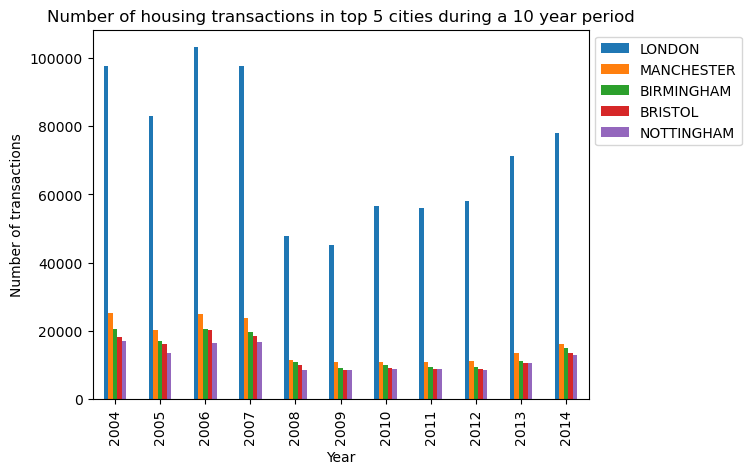

In [21]:
ax=plot_df[['LONDON','MANCHESTER', 'BIRMINGHAM', 'BRISTOL', 'NOTTINGHAM'
           ]].plot(kind='bar',title='Number of housing transactions in top 5 cities during a 10 year period',xlabel='Year',ylabel='Number of transactions')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()
